# skFIBERS Datasim Experiments

## Imports

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skfibers.fibers import FIBERS
from skfibers.experiments import create_data_simulation_bin

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
data = create_data_simulation_bin(number_of_instances=10000, number_of_features=50, number_of_features_in_bin=10,
                               no_fail_proportion=0.5, mm_frequency_range=(0.4, 0.5), noise_frequency=0.1,
                               class0_time_to_event_range=(1.5, 0.2), class1_time_to_event_range=(1, 0.2),
                               censoring_frequency=0.5, random_seed=None, negative=False)

## Functions to Run Experiment

In [4]:
def experiment(number_of_instances=10000, number_of_features=50, number_of_features_in_bin=10,
                               no_fail_proportion=0.5, mm_frequency_range=(0.4, 0.5), noise_frequency=0.1,
                               class0_time_to_event_range=(1.7, 0.2), class1_time_to_event_range=(1, 0.2),
                               censoring_frequency=0.5, random_seed=42, negative=False):
    for replicate in range(0, 1):
        data = create_data_simulation_bin(number_of_instances, number_of_features, number_of_features_in_bin,
                               no_fail_proportion, mm_frequency_range, noise_frequency,
                               class0_time_to_event_range, class1_time_to_event_range,
                               censoring_frequency, random_seed, negative)
        true_risk_group = data[['TrueRiskGroup']]
        data = data.drop('TrueRiskGroup', axis=1)
        fibers = FIBERS(label_name="Censoring", duration_name="Duration", 
                        given_starting_point=False, amino_acid_start_point=None,
                        amino_acid_bins_start_point=None, iterations=100, 
                        set_number_of_bins=50, min_features_per_group=2,
                        max_number_of_groups_with_feature=2, 
                        informative_cutoff=0.2, crossover_probability=0.8,
                        mutation_probability=0.4, elitism_parameter=0.8,
                        random_seed=None)
        fibers.fit(data)
    return fibers

In [5]:
for negative in [False]:
    fibers = experiment(negative=negative, noise_frequency=0)

100%|█████████████████████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


In [6]:
fibers.get_top_bin_summary()

Top Bin of Features:
['P_6', 'P_7', 'P_1']
---
Number of Instances with No Mismatches in Bin:
5817
Number of Instances with Mismatch(es) in Bin:
4183
---
p-value from Log Rank Test:
0.0


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        4781.12 <0.005       inf

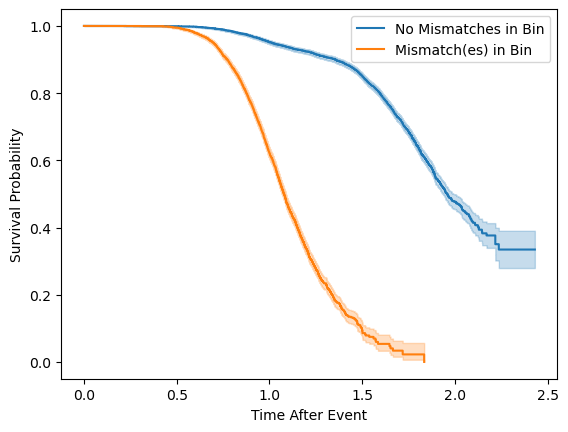

In [7]:
fibers.get_top_bin_survival_plot()

In [8]:
display(fibers.get_top_bin_scores())

,Bin #,Score,Bins
0,Bin 25,4781.118977,"[P_6, P_7, P_1]"
1,Bin 18,3716.352422,"[P_2, P_8]"
2,Bin 29,3706.015871,"[P_4, P_8]"
3,Bin 33,3706.015871,"[P_8, P_4]"
4,Bin 4,3700.977334,"[P_10, P_1]"
5,Bin 2,3698.230410,"[P_9, P_4]"
6,Bin 26,3685.197832,"[P_4, P_1]"
7,Bin 35,3685.197832,"[P_1, P_4]"
8,Bin 13,3640.785529,"[P_4, P_7]"
9,Bin 39,3640.785529,"[P_7, P_4]"
